In [517]:
import pandas as pd
import numpy as np

#Loading data in dataframe

companies = pd.read_csv("companies.txt", sep="\t", encoding = "ISO-8859-1")

rounds2 = pd.read_csv('rounds2.csv' , encoding = "ISO-8859-1")

mapping = pd.read_csv('mapping.csv' , encoding = "ISO-8859-1")



companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [518]:
companies.describe()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
count,66368,66367,61310,63220,66368,59410,57821,58338,58340,51147
unique,66368,66102,61191,27296,4,137,311,1092,5111,3978
top,/Organization/Nanogram,Roost,http://www.askforoffer.com,Software,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012
freq,1,4,5,3995,53034,37601,12900,8804,3526,2730


In [519]:
#companies.duplicated()

any(companies['permalink'].duplicated())

#Checking for duplicate values
#any(rounds2['company_permalink'].duplicated())

#Dropping Duplicate Values from Round2
#rounds2.drop_duplicates(subset ="company_permalink", 
#                     keep = False, inplace = True) 

False

In [520]:
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [521]:
rounds2['company_permalink'] = rounds2['company_permalink'].apply(lambda x: x.upper())
companies['permalink']= companies['permalink'].apply(lambda x: x.upper())



any(companies.duplicated())

False

In [522]:
#Unique Count of companies in round 2
rounds2['company_permalink'].nunique()

66370

In [523]:
#rounds2['company_permalink'].count()

#Unique Count in Companies file
companies['permalink'].nunique()

66368

In [524]:
#companies.join(rounds2.set_index('company_permalink'), on='permalink')

In [525]:
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/ORGANIZATION/-FAME,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/ORGANIZATION/-QOUNTER,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/ORGANIZATION/0-6-COM,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/ORGANIZATION/004-TECHNOLOGIES,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [526]:
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
company_permalink          114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [527]:
#Round 2 Perma links not in countries
rounds2['company_permalink'].isin(companies['permalink']).value_counts()

True     114942
False         7
Name: company_permalink, dtype: int64

In [528]:
master_frame = pd.merge(rounds2, companies, how='inner', left_on='company_permalink' , right_on='permalink')

In [529]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114942 entries, 0 to 114941
Data columns (total 16 columns):
company_permalink          114942 non-null object
funding_round_permalink    114942 non-null object
funding_round_type         114942 non-null object
funding_round_code         31139 non-null object
funded_at                  114942 non-null object
raised_amount_usd          94958 non-null float64
permalink                  114942 non-null object
name                       114941 non-null object
homepage_url               108810 non-null object
category_list              111535 non-null object
status                     114942 non-null object
country_code               106271 non-null object
state_code                 104003 non-null object
region                     104782 non-null object
city                       104785 non-null object
founded_at                 94422 non-null object
dtypes: float64(1), object(15)
memory usage: 14.9+ MB


In [530]:
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/ORGANIZATION/-FAME,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,/ORGANIZATION/-QOUNTER,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/ORGANIZATION/-QOUNTER,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,/ORGANIZATION/-QOUNTER,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/ORGANIZATION/0-6-COM,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/ORGANIZATION/0-6-COM,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007


In [531]:
#Calculate percentage of missing values in DataFrame
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
permalink                   0.00
name                        0.00
homepage_url                5.33
category_list               2.96
status                      0.00
country_code                7.54
state_code                  9.52
region                      8.84
city                        8.84
founded_at                 17.85
dtype: float64

In [532]:
#Dropping funding_round_code as it has about 72% missing values
#master_frame = master_frame.drop('funding_round_code', axis=1)
master_frame = master_frame[~master_frame['country_code'].isnull()]
master_frame = master_frame[~master_frame['category_list'].isnull()]

master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/ORGANIZATION/-FAME,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,/ORGANIZATION/-QOUNTER,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/ORGANIZATION/-QOUNTER,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,/ORGANIZATION/-QOUNTER,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
4,/ORGANIZATION/0-6-COM,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/ORGANIZATION/0-6-COM,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
5,/ORGANIZATION/004-TECHNOLOGIES,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,NaN,/ORGANIZATION/004-TECHNOLOGIES,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [533]:
#master_frame = master_frame.drop('company_permalink', axis=1)

In [534]:
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         71.94
funded_at                   0.00
raised_amount_usd          15.31
permalink                   0.00
name                        0.00
homepage_url                4.04
category_list               0.00
status                      0.00
country_code                0.00
state_code                  2.12
region                      1.39
city                        1.39
founded_at                 15.37
dtype: float64

In [535]:
master_frame['raised_amount_usd'].describe()

count    8.852900e+04
mean     1.047385e+07
std      1.118118e+08
min      0.000000e+00
25%      3.705180e+05
50%      1.800000e+06
75%      7.100000e+06
max      2.127194e+10
Name: raised_amount_usd, dtype: float64

In [536]:
#Dropping null values as it is difficult to compute 17% missing data
master_frame = master_frame[~np.isnan(master_frame['raised_amount_usd'])]
#master_frame = master_frame[~np.isnan(master_frame['category_list'])]

#Converting data to million USD
master_frame['raised_amount_usd'] = master_frame['raised_amount_usd']/1000000

In [537]:
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         69.75
funded_at                   0.00
raised_amount_usd           0.00
permalink                   0.00
name                        0.00
homepage_url                3.67
category_list               0.00
status                      0.00
country_code                0.00
state_code                  1.96
region                      1.34
city                        1.33
founded_at                 15.10
dtype: float64

In [538]:
master_frame.shape

(88529, 16)

In [635]:
master_frame_ana = master_frame.copy()

master_frame_ana = master_frame_ana[(master_frame_ana['funding_round_type'] == 'venture') 
                            | (master_frame_ana['funding_round_type'] == 'seed')
                            | (master_frame_ana['funding_round_type'] == 'angel')
                            | (master_frame_ana['funding_round_type'] == 'private_equity')]
master_frame_ana.head()

df_by_investment_type = master_frame_ana.groupby('funding_round_type')
#rows_venture,columns_venture = master_frame.loc[master_frame['funding_round_type']=='venture'].shape

In [636]:
plot1_df = df_by_investment_type.raised_amount_usd.mean().sort_values(ascending = False)
#master_frame.loc[master_frame['funding_round_type']=='venture'].
plot1_df

plot1_df = pd.DataFrame(plot1_df)

plot1_df.head()



,raised_amount_usd
funding_round_type,
private_equity,74.164439
venture,11.733933
angel,0.972727
seed,0.747172


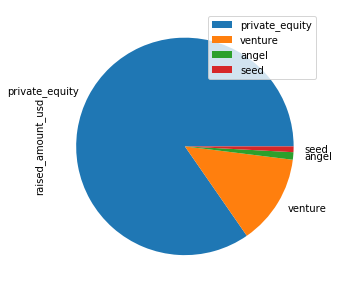

In [638]:
#plot1_df.drop(labels =['post_ipo_debt','secondary_market','post_ipo_equity','debt_financing'])

plot = plot1_df.plot.pie(y='raised_amount_usd', figsize=(10, 5))

In [541]:
master_frame_for_venture = master_frame.loc[master_frame['funding_round_type']=='venture']

In [542]:
master_frame_for_venture.shape

(47809, 16)

In [543]:
round(100*(master_frame_for_venture.isnull().sum()/len(master_frame.index)), 2)

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         23.89
funded_at                   0.00
raised_amount_usd           0.00
permalink                   0.00
name                        0.00
homepage_url                2.37
category_list               0.00
status                      0.00
country_code                0.00
state_code                  0.83
region                      0.67
city                        0.67
founded_at                  9.43
dtype: float64

In [544]:
master_frame_for_venture['country_code'].describe()

count     47809
unique       97
top         USA
freq      35943
Name: country_code, dtype: object

In [545]:
print(master_frame_for_venture[master_frame_for_venture['country_code'].isnull()].head())

Empty DataFrame
Columns: [company_permalink, funding_round_permalink, funding_round_type, funding_round_code, funded_at, raised_amount_usd, permalink, name, homepage_url, category_list, status, country_code, state_code, region, city, founded_at]
Index: []


In [546]:
#master_frame_for_venture.dropna(inplace=True)
#df.dropna(inplace=True)
#Web Scraping Countries from Wiki
round(100*(master_frame_for_venture.isnull().sum()/len(master_frame.index)), 2)

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         23.89
funded_at                   0.00
raised_amount_usd           0.00
permalink                   0.00
name                        0.00
homepage_url                2.37
category_list               0.00
status                      0.00
country_code                0.00
state_code                  0.83
region                      0.67
city                        0.67
founded_at                  9.43
dtype: float64

In [651]:
df_by_country_code = master_frame_for_venture.groupby('country_code')
top_countries = df_by_country_code.raised_amount_usd.sum().sort_values(ascending = False).head(9)
top_countries_list = top_countries.keys()

top_countries.head(9)

country_code
USA    420068.029342
CHN     39338.918773
GBR     20072.813004
IND     14261.508718
CAN      9482.217668
FRA      7226.851352
ISR      6854.350477
DEU      6306.921981
JPN      3167.647127
Name: raised_amount_usd, dtype: float64

In [548]:
import requests
website_url = requests.get('https://en.wikipedia.org/wiki/List_of_territorial_entities_where_English_is_an_official_language').text

In [549]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(website_url,'lxml')
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of territorial entities where English is an official language - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgMonthNamesShort":["","Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"],"wgRequestId":"Xhr7xwpAMEkAAIA4A9kAAADH","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_territorial_entities_where_English_is_an_official_language","wgTitle":"List of territorial entities where English is an official language","wgCurRevisionId":935396332,"wgRevisionId":935396332,"wgArticleId":750096,"wgIsArticle":!0,

In [550]:
Body = soup.body.find(id="mw-content-text",class_='mw-content-ltr')
All_table = Body.find_all('table',class_ = 'wikitable sortable')

In [551]:
Countries = []
Country_code = []
for table in All_table:
    rows = table.findAll('tr')
    for row in rows:
        data = row.findAll('td')
        #print(data)
        country_code = data[2::4]
        for code in country_code:
            code = str(code)[4:-6]
            if len(code) == 3:
                Country_code.append(code)
            
    links = table.findAll('a')
    for link in links:
        Countries.append(link.get('title'))
Countries = list(filter(None, Countries))
unwanted_list = ['List of countries by population','De facto','De jure','De facto','Official language']
for keyword in unwanted_list:
    Countries.remove(keyword)
    
print(Countries)
print(Country_code)

['Australia', 'New Zealand', 'United Kingdom', 'United States', 'Antigua and Barbuda', 'The Bahamas', 'Barbados', 'Belize', 'Botswana', 'Burundi', 'Cameroon', 'Canada', 'Quebec', 'New Brunswick', 'Nunavut', 'Cook Islands', 'Dominica', 'Eswatini', 'Fiji', 'The Gambia', 'Ghana', 'Lingua franca', 'Grenada', 'Guyana', 'India', 'Republic of Ireland', 'Irish language', 'Jamaica', 'Kenya', 'Kiribati', 'Lesotho', 'Liberia', 'Malawi', 'Malta', 'Marshall Islands', 'Mauritius', 'Federated States of Micronesia', 'Namibia', 'Nauru', 'Nigeria', 'Lingua franca', 'Niue', 'Pakistan', 'Palau', 'Papua New Guinea', 'Philippines', 'Filipino language', 'Rwanda', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'Samoa', 'Seychelles', 'Sierra Leone', 'Singapore', 'Solomon Islands', 'Somaliland', 'South Africa', 'Lingua franca', 'Formal economy', 'South Sudan', 'Sudan', 'Tanzania', 'Tonga', 'Trinidad and Tobago', 'Tuvalu', 'Uganda', 'Vanuatu', 'Zambia', 'Zimbabwe', 'Lingua franca', '

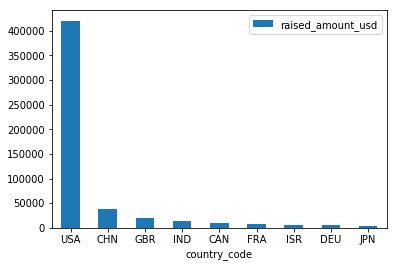

In [645]:
country_code_df = pd.DataFrame(Country_code,columns =['country_code']) 
top9 = pd.DataFrame(top_countries_list)
top9.head()

top_countries.head()

plot2_df = pd.DataFrame(top_countries)


plot2_df.head()
ax = plot2_df.plot.bar( y='raised_amount_usd', rot=0)

In [552]:
#top9.join(country_code_df, on='country_code')
top_english_countries = pd.merge(country_code_df, top9, how='inner', on='country_code')

In [553]:
top3 = pd.merge(top_english_countries,master_frame_for_venture,how='inner',on='country_code')

In [554]:
top3.head()
df_by_country_code = top3.groupby('country_code')
top3_countries = df_by_country_code.raised_amount_usd.sum().sort_values(ascending = False).head(3)

In [555]:
top3_countries

country_code
USA    420068.029342
GBR     20072.813004
IND     14261.508718
Name: raised_amount_usd, dtype: float64

In [556]:
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10.00000,/ORGANIZATION/-FAME,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
2,/ORGANIZATION/-QOUNTER,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,0.70000,/ORGANIZATION/-QOUNTER,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
4,/ORGANIZATION/0-6-COM,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2.00000,/ORGANIZATION/0-6-COM,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
6,/ORGANIZATION/01GAMES-TECHNOLOGY,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,NaN,01-07-2014,0.04125,/ORGANIZATION/01GAMES-TECHNOLOGY,01Games Technology,http://www.01games.hk/,Games,operating,HKG,NaN,Hong Kong,Hong Kong,NaN
7,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,NaN,11-09-2009,0.04336,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997


In [557]:
master_frame.loc[:, ['category_list']].describe()

,category_list
count,88529
unique,21317
top,Biotechnology
freq,7621


In [558]:
master_frame['company_permalink'].value_counts()

/ORGANIZATION/SOLARFLARE                                           19
/ORGANIZATION/EXAGEN-DIAGNOSTICS                                   18
/ORGANIZATION/SEMPRIUS                                             18
/ORGANIZATION/ENDOGASTRIC-SOLUTIONS                                17
/ORGANIZATION/TIGO-ENERGY                                          17
/ORGANIZATION/FRESENIUS-MEDICAL-CARE                               16
/ORGANIZATION/TYRO-PAYMENTS                                        16
/ORGANIZATION/MOBIVERY                                             16
/ORGANIZATION/INSTAMED                                             15
/ORGANIZATION/GROWLIFE                                             15
/ORGANIZATION/NEXT-STEP-LIVING                                     15
/ORGANIZATION/TERASCALA                                            15
/ORGANIZATION/CNS-RESPONSE                                         15
/ORGANIZATION/APERTO-NETWORKS                                      15
/ORGANIZATION/BTI-SY

In [559]:
company_link = master_frame.loc[master_frame['category_list'].isnull(),['company_permalink']].head()
company_link.head()

,company_permalink


In [560]:
#master_frame.loc[master_frame['company_permalink'].isin(master_frame.loc[master_frame['category_list'].isnull(),['company_permalink'])]
#category_list_df = []
#for company in company_link['company_permalink']:
    #category_list_df.append(master_frame.loc[master_frame['company_permalink'] == company])
    #print (master_frame.loc[master_frame['company_permalink'] == company])

#category_list_df.value_count()

In [561]:

new = master_frame["category_list"].str.split("|", n = 1, expand = True) 
master_frame['primary sector'] = new[0]


In [562]:
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [563]:
#new['column'] = new.apply(lambda x: mapping.columns[x.argmax()], axis = 1)

In [564]:
mapping.set_index('category_list')
#new['main_sector'] = get_column_name(primary_sector)

#print(mapping.Entertainment.dtype)

#new = pd.DataFrame([8,13,4])


def get_column_name(primary_sector):
    row = mapping.loc[mapping['category_list'] == primary_sector]
    del row['category_list'] 
    return row.idxmax(axis=1)
     
new_df = pd.DataFrame()
new_df['main_sector'] = master_frame['primary sector'].head()
print(new_df['main_sector'].apply(get_column_name))
#master_frame['main sector'].head()

get_column_name('Media')

#new_df.head()


                          31                          66   \
0                         NaN                         NaN   
2  News, Search and Messaging                         NaN   
4                         NaN                         NaN   
6                         NaN                         NaN   
7                         NaN  Cleantech / Semiconductors   

                          168            299            434  
0                         NaN            NaN  Entertainment  
2                         NaN            NaN            NaN  
4  News, Search and Messaging            NaN            NaN  
6                         NaN  Entertainment            NaN  
7                         NaN            NaN            NaN  


434    Entertainment
dtype: object

In [565]:
mapping.category_list = mapping.category_list.replace({'0':'na', '2.na' :'2.0'}, regex=True)
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [566]:
#Reshaping the mapping dataframe to merge with the master_frame dataframe. Using melt() function to unpivot the table.
mapping = pd.melt(mapping, id_vars =['category_list'], value_vars =['Manufacturing','Automotive & Sports',
                                                              'Cleantech / Semiconductors','Entertainment',
                                                             'Health','News, Search and Messaging','Others',
                                                             'Social, Finance, Analytics, Advertising']) 
mapping = mapping[~(mapping.value == 0)]
mapping = mapping.drop('value', axis = 1)
mapping = mapping.rename(columns = {"variable":"main_sector"})
mapping.head()

,category_list,main_sector
1,3D,Manufacturing
2,3D Printing,Manufacturing
3,3D Technology,Manufacturing
7,Advanced Materials,Manufacturing
15,Agriculture,Manufacturing


In [567]:
mapping.rename(columns = {'category_list':'primary sector'}, inplace = True)

In [568]:
master_frame = master_frame.merge(mapping,how='inner',left_on = 'primary sector',right_on = 'primary sector')

In [649]:

master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary sector,main_sector
0,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10.00,/ORGANIZATION/-FAME,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,Media,Entertainment
1,/ORGANIZATION/90MIN,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,15.00,/ORGANIZATION/90MIN,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,Media,Entertainment
2,/ORGANIZATION/90MIN,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,5.80,/ORGANIZATION/90MIN,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,Media,Entertainment
3,/ORGANIZATION/90MIN,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,NaN,26-03-2014,18.00,/ORGANIZATION/90MIN,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,Media,Entertainment
4,/ORGANIZATION/A-DANCE-FOR-ME,/funding-round/9ab9dbd17bf010c79d8415b2c22be6fa,equity_crowdfunding,NaN,26-03-2014,1.09,/ORGANIZATION/A-DANCE-FOR-ME,A Dance for Me,http://www.adanceforme.com/,Media|News|Photo Sharing|Video,operating,USA,MT,Missoula,Missoula,31-07-2011,Media,Entertainment


In [571]:
print(master_frame[master_frame.main_sector.isnull()])

Empty DataFrame
Columns: [company_permalink, funding_round_permalink, funding_round_type, funding_round_code, funded_at, raised_amount_usd, permalink, name, homepage_url, category_list, status, country_code, state_code, region, city, founded_at, primary sector, main_sector]
Index: []


In [647]:
D1 = master_frame[(master_frame['country_code'] == 'USA') & 
             (master_frame['raised_amount_usd'] >= 5) & 
             (master_frame['raised_amount_usd'] <= 15)]
D1_gr = D1[['raised_amount_usd','main_sector']].groupby('main_sector').agg(['sum', 'count']).rename(
    columns={'sum':'Total_amount','count' : 'Total_count'})
D1 = D1.merge(D1_gr, how='left', on ='main_sector')
D1.head()



,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary sector,main_sector,"(raised_amount_usd, Total_amount)","(raised_amount_usd, Total_count)"
0,/ORGANIZATION/ALL-DEF-DIGITAL,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,06-08-2014,5.0,/ORGANIZATION/ALL-DEF-DIGITAL,All Def Digital,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,NaN,Media,Entertainment,5548.30738,646
1,/ORGANIZATION/CHEFS-FEED,/funding-round/adca195749ae9ace84684723fbe75e5b,venture,A,26-02-2015,5.0,/ORGANIZATION/CHEFS-FEED,ChefsFeed,http://www.chefsfeed.com,Media|Mobile|Restaurants|Technology,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012,Media,Entertainment,5548.30738,646
2,/ORGANIZATION/HUFFINGTONPOST,/funding-round/7f05940c4d2dfecb8e50a0e5720e5065,venture,A,01-08-2006,5.0,/ORGANIZATION/HUFFINGTONPOST,The Huffington Post,http://www.huffingtonpost.com,Media|News|Publishing,acquired,USA,NY,New York City,New York,09-05-2005,Media,Entertainment,5548.30738,646
3,/ORGANIZATION/HUFFINGTONPOST,/funding-round/9241ae16e08df17ebdc064e49e23035a,venture,B,01-09-2007,5.0,/ORGANIZATION/HUFFINGTONPOST,The Huffington Post,http://www.huffingtonpost.com,Media|News|Publishing,acquired,USA,NY,New York City,New York,09-05-2005,Media,Entertainment,5548.30738,646
4,/ORGANIZATION/MATCHMINE,/funding-round/41ac526630da57ad6eb9d02431b17657,venture,A,01-09-2007,10.0,/ORGANIZATION/MATCHMINE,MatchMine,http://matchmine.com,Media|News|Reviews and Recommendations,closed,USA,MA,Boston,Needham,01-01-2007,Media,Entertainment,5548.30738,646


In [577]:
D2 = master_frame[(master_frame['country_code'] == 'GBR') & 
             (master_frame['raised_amount_usd'] >= 5) & 
             (master_frame['raised_amount_usd'] <= 15)]
D2_gr = D2[['raised_amount_usd','main_sector']].groupby('main_sector').agg(['sum', 'count']).rename(
    columns={'sum':'Total_amount','count' : 'Total_count'})
D2 = D2.merge(D2_gr, how='left', on ='main_sector')
D2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary sector,main_sector,"(raised_amount_usd, Total_amount)","(raised_amount_usd, Total_count)"
0,/ORGANIZATION/90MIN,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,15.00,/ORGANIZATION/90MIN,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,Media,Entertainment,517.580316,60
1,/ORGANIZATION/90MIN,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,5.80,/ORGANIZATION/90MIN,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,Media,Entertainment,517.580316,60
2,/ORGANIZATION/COMMON-INTEREST-COMMUNITIES,/funding-round/8195587cbd5e51af7514ee92ef4ba6ba,venture,NaN,09-07-2014,10.00,/ORGANIZATION/COMMON-INTEREST-COMMUNITIES,Common Interest Communities,http://commoninterestcommunities.com/,Application Platforms|Internet|Software|Startups,operating,GBR,H9,London,London,NaN,Application Platforms,"News, Search and Messaging",795.798998,95
3,/ORGANIZATION/GEOSPOCK-LTD-,/funding-round/cf3fe3b7c86186b9f478d0ea37613f7a,venture,NaN,01-10-2014,5.46,/ORGANIZATION/GEOSPOCK-LTD-,GeoSpock Ltd.,http://www.geospock.com,Application Platforms|Databases|Real Time,operating,GBR,C3,London,Cambridge,01-01-2013,Application Platforms,"News, Search and Messaging",795.798998,95
4,/ORGANIZATION/GEOSPOCK-LTD-,/funding-round/e5e4ef4ebae63fc36ef0cd57dd20ff1c,venture,A,05-10-2015,5.40,/ORGANIZATION/GEOSPOCK-LTD-,GeoSpock Ltd.,http://www.geospock.com,Application Platforms|Databases|Real Time,operating,GBR,C3,London,Cambridge,01-01-2013,Application Platforms,"News, Search and Messaging",795.798998,95


In [578]:
D3 = master_frame[(master_frame['country_code'] == 'IND') & 
             (master_frame['raised_amount_usd'] >= 5) & 
             (master_frame['raised_amount_usd'] <= 15)]
D3_gr = D3[['raised_amount_usd','main_sector']].groupby('main_sector').agg(['sum', 'count']).rename(
    columns={'sum':'Total_amount','count' : 'Total_count'})
D3 = D3.merge(D3_gr, how='left', on ='main_sector')
D3.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary sector,main_sector,"(raised_amount_usd, Total_amount)","(raised_amount_usd, Total_count)"
0,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10.00,/ORGANIZATION/-FAME,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,Media,Entertainment,293.830000,34
1,/ORGANIZATION/BABAJOB,/funding-round/b72eaac5ea12ac0f50573ac3d6d46b8d,venture,B,28-04-2015,10.00,/ORGANIZATION/BABAJOB,Babajob,http://www.babajob.com,Curated Web|Information Technology|Services|St...,operating,IND,19,Bangalore,Bangalore,27-08-2007,Curated Web,"News, Search and Messaging",439.834545,53
2,/ORGANIZATION/BHARAT-MATRIMONY,/funding-round/e37673bc7b0f1dfd3782f8f7abdb9ec8,venture,B,05-02-2008,11.75,/ORGANIZATION/BHARAT-MATRIMONY,Bharat Matrimony,http://www.bharatmatrimony.com,Curated Web|Match-Making,operating,IND,25,Chennai,Chennai,12-03-1969,Curated Web,"News, Search and Messaging",439.834545,53
3,/ORGANIZATION/BLUESTONE-COM,/funding-round/452a7fc1f34df2d3dcda4e28234bc671,venture,A,24-01-2012,5.00,/ORGANIZATION/BLUESTONE-COM,Bluestone.com,http://bluestone.com,Curated Web,operating,IND,19,Bangalore,Bangalore,01-01-2011,Curated Web,"News, Search and Messaging",439.834545,53
4,/ORGANIZATION/BLUESTONE-COM,/funding-round/f5b252d6442ce231bb01586ca1821f63,venture,B,18-03-2014,10.00,/ORGANIZATION/BLUESTONE-COM,Bluestone.com,http://bluestone.com,Curated Web,operating,IND,19,Bangalore,Bangalore,01-01-2011,Curated Web,"News, Search and Messaging",439.834545,53


In [579]:
print(D1.raised_amount_usd.count())
print(D2.raised_amount_usd.count())
print(D3.raised_amount_usd.count())

13638
753
345


In [580]:
print(round(D1.raised_amount_usd.sum(), 2))
print(round(D2.raised_amount_usd.sum(), 2))
print(round(D3.raised_amount_usd.sum(), 2))

120886.42
6464.76
3076.66


In [583]:
D1_gr

raised_amount_usd            
                                             Total_amount Total_count
main_sector                                                          
Automotive & Sports                           1678.993953         195
Cleantech / Semiconductors                   25549.799589        2795
Entertainment                                 5548.307380         646
Health                                        9968.338264        1119
Manufacturing                                 8129.982494         900
News, Search and Messaging                   14841.901285        1696
Others                                       29143.824813        3294
Social, Finance, Analytics, Advertising      26025.274200        2993

In [584]:
D2_gr

raised_amount_usd            
                                             Total_amount Total_count
main_sector                                                          
Automotive & Sports                            206.020388          21
Cleantech / Semiconductors                    1425.325799         162
Entertainment                                  517.580316          60
Health                                         281.047028          33
Manufacturing                                  482.368699          56
News, Search and Messaging                     795.798998          95
Others                                        1498.214338         172
Social, Finance, Analytics, Advertising       1258.408671         154

In [585]:
D3_gr

raised_amount_usd            
                                             Total_amount Total_count
main_sector                                                          
Automotive & Sports                            141.900000          14
Cleantech / Semiconductors                     173.980000          21
Entertainment                                  293.830000          34
Health                                         173.740000          20
Manufacturing                                  200.900000          21
News, Search and Messaging                     439.834545          53
Others                                        1061.028268         116
Social, Finance, Analytics, Advertising        591.449550          66

In [586]:
D1.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary sector,main_sector,"(raised_amount_usd, Total_amount)","(raised_amount_usd, Total_count)"
0,/ORGANIZATION/ALL-DEF-DIGITAL,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,06-08-2014,5.0,/ORGANIZATION/ALL-DEF-DIGITAL,All Def Digital,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,NaN,Media,Entertainment,5548.30738,646
1,/ORGANIZATION/CHEFS-FEED,/funding-round/adca195749ae9ace84684723fbe75e5b,venture,A,26-02-2015,5.0,/ORGANIZATION/CHEFS-FEED,ChefsFeed,http://www.chefsfeed.com,Media|Mobile|Restaurants|Technology,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012,Media,Entertainment,5548.30738,646
2,/ORGANIZATION/HUFFINGTONPOST,/funding-round/7f05940c4d2dfecb8e50a0e5720e5065,venture,A,01-08-2006,5.0,/ORGANIZATION/HUFFINGTONPOST,The Huffington Post,http://www.huffingtonpost.com,Media|News|Publishing,acquired,USA,NY,New York City,New York,09-05-2005,Media,Entertainment,5548.30738,646
3,/ORGANIZATION/HUFFINGTONPOST,/funding-round/9241ae16e08df17ebdc064e49e23035a,venture,B,01-09-2007,5.0,/ORGANIZATION/HUFFINGTONPOST,The Huffington Post,http://www.huffingtonpost.com,Media|News|Publishing,acquired,USA,NY,New York City,New York,09-05-2005,Media,Entertainment,5548.30738,646
4,/ORGANIZATION/MATCHMINE,/funding-round/41ac526630da57ad6eb9d02431b17657,venture,A,01-09-2007,10.0,/ORGANIZATION/MATCHMINE,MatchMine,http://matchmine.com,Media|News|Reviews and Recommendations,closed,USA,MA,Boston,Needham,01-01-2007,Media,Entertainment,5548.30738,646


In [589]:
 D1.sort_values(by=['raised_amount_usd'],ascending = False)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary sector,main_sector,"(raised_amount_usd, Total_amount)","(raised_amount_usd, Total_count)"
4822,/ORGANIZATION/PRIMCOGENT-SOLUTIONS,/funding-round/5e6b2797353ce0978a96d7e6566efe18,venture,NaN,02-05-2012,15.0,/ORGANIZATION/PRIMCOGENT-SOLUTIONS,Primcogent Solutions,http://www.primcogent.com,Health Care,operating,USA,TX,Dallas,Dallas,01-01-2009,Health Care,Health,9968.338264,1119
8917,/ORGANIZATION/REDIS-LABS,/funding-round/133cd7aec68f045ac22eae617f4c8670,venture,B,25-06-2015,15.0,/ORGANIZATION/REDIS-LABS,Redis Labs,http://redislabs.com,Big Data|Cloud Data Services|Databases|Enterpr...,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,Big Data,"Social, Finance, Analytics, Advertising",26025.274200,2993
5961,/ORGANIZATION/SRC-COMPUTERS,/funding-round/d25f1ec7e668582089e34acf6a86dafe,venture,NaN,08-10-2013,15.0,/ORGANIZATION/SRC-COMPUTERS,SRC Computers,http://srccomp.com,Software,operating,USA,CO,Colorado Springs,Colorado Springs,01-01-1996,Software,Others,29143.824813,3294
3702,/ORGANIZATION/SAMBAZON,/funding-round/8d0ceb417a98736132a38570fb6f2a5c,venture,D,15-01-2015,15.0,/ORGANIZATION/SAMBAZON,Sambazon,http://sambazon.com,E-Commerce,operating,USA,CA,Anaheim,San Clemente,01-01-2000,E-Commerce,Others,29143.824813,3294
7236,/ORGANIZATION/BURSTMEDIA,/funding-round/5cd92d6c9c457d3e7341fe8a1507f98c,private_equity,NaN,01-02-2000,15.0,/ORGANIZATION/BURSTMEDIA,Burst Media,http://www.burstmedia.com,Advertising,closed,USA,NY,New York City,New York,01-01-1995,Advertising,"Social, Finance, Analytics, Advertising",26025.274200,2993
5455,/ORGANIZATION/INFINETA-SYSTEMS,/funding-round/3ae755947ed58561bd19142a2ed5f54d,venture,A,07-05-2010,15.0,/ORGANIZATION/INFINETA-SYSTEMS,Infineta Systems,http://www.infineta.com,Software,closed,USA,CA,SF Bay Area,San Jose,01-01-2008,Software,Others,29143.824813,3294
5456,/ORGANIZATION/INFINETA-SYSTEMS,/funding-round/9e31b8357ef186925b6eb8a6111712d2,venture,B,06-06-2011,15.0,/ORGANIZATION/INFINETA-SYSTEMS,Infineta Systems,http://www.infineta.com,Software,closed,USA,CA,SF Bay Area,San Jose,01-01-2008,Software,Others,29143.824813,3294
12205,/ORGANIZATION/WORKDAY,/funding-round/4262e73e982938f98212e3408d2d6e07,venture,NaN,01-01-2005,15.0,/ORGANIZATION/WORKDAY,Workday,http://www.workday.com,Colleges|Enterprise Software|Finance|FinTech|H...,ipo,USA,CA,SF Bay Area,Pleasanton,01-03-2005,Colleges,"Social, Finance, Analytics, Advertising",26025.274200,2993
10072,/ORGANIZATION/MERAKI,/funding-round/767a7fa04a0adedae522d3af762c17e7,venture,C,07-02-2011,15.0,/ORGANIZATION/MERAKI,Meraki,http://meraki.com,Networking|Network Security,acquired,USA,CA,SF Bay Area,San Francisco,01-04-2006,Networking,Others,29143.824813,3294
8920,/ORGANIZATION/ROCANA,/funding-round/a74acbe67eeb277784300ba337abf421,venture,B,30-04-2015,15.0,/ORGANIZATION/ROCANA,Rocana,http://rocana.com,Big Data|Databases|Information Technology,operating,USA,MA,Boston,Boston,01-02-2014,Big Data,"Social, Finance, Analytics, Advertising",26025.274200,2993


In [590]:
company = D1[D1['main_sector']=='Others']
company = company.pivot_table(values = 'raised_amount_usd', index = 'company_permalink', aggfunc = 'sum')
company = company.sort_values(by = 'raised_amount_usd', ascending = False).head()
print(company.head(1))

                                raised_amount_usd
company_permalink                                
/ORGANIZATION/EMORY-UNIVERSITY               81.5


In [591]:
company = D1[D1['main_sector']=='Social, Finance, Analytics, Advertising']
company = company.pivot_table(values = 'raised_amount_usd', index = 'company_permalink', aggfunc = 'sum')
company = company.sort_values(by = 'raised_amount_usd', ascending = False).head()
print(company.head(1))

                            raised_amount_usd
company_permalink                            
/ORGANIZATION/CHOICESTREAM               73.3


In [592]:
#For the top sector GBR , which company received the highest investment?
company = D2[D2['main_sector']=='Others']
company = company.pivot_table(values = 'raised_amount_usd', index = 'company_permalink', aggfunc = 'sum')
company = company.sort_values(by = 'raised_amount_usd', ascending = False).head()
print(company.head(1))

#For the second top sector GBR , which company received the highest investment?
company = D2[D2['main_sector']=='Social, Finance, Analytics, Advertising']
company = company.pivot_table(values = 'raised_amount_usd', index = 'company_permalink', aggfunc = 'sum')
company = company.sort_values(by = 'raised_amount_usd', ascending = False).head()
print(company.head(1))

                         raised_amount_usd
company_permalink                         
/ORGANIZATION/IP-ACCESS          39.683329
                                     raised_amount_usd
company_permalink                                     
/ORGANIZATION/CELLTICK-TECHNOLOGIES               37.5


In [593]:
#For the top sector IND , which company received the highest investment?
company = D3[D3['main_sector']=='Others']
company = company.pivot_table(values = 'raised_amount_usd', index = 'company_permalink', aggfunc = 'sum')
company = company.sort_values(by = 'raised_amount_usd', ascending = False).head()
print(company.head(1))

#For the second top sector IND , which company received the highest investment?
company = D3[D3['main_sector']=='News, Search and Messaging']
company = company.pivot_table(values = 'raised_amount_usd', index = 'company_permalink', aggfunc = 'sum')
company = company.sort_values(by = 'raised_amount_usd', ascending = False).head()
print(company.head(1))

                            raised_amount_usd
company_permalink                            
/ORGANIZATION/FIRSTCRY-COM               39.0
                                                raised_amount_usd
company_permalink                                                
/ORGANIZATION/GUPSHUP-TECHNOLOGY-INDIA-PVT-LTD               33.0
